# Exercises
* Within your codeup-data-science directory, create a new repo named anomaly-detection-exercises. This will be where you do your work for this module. Create a repository on GitHub with the same name, and link your local repository to GitHub.

* Save this work in your anomaly-detection-exercises repo. Then add, commit, and push your changes.

* continuous_probabilistic_methods.py or continuous_probabilistic_methods.ipynb 1. Define a function named get_lower_and_upper_bounds that has two arguments. The first argument is a pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

## 1. Using lemonade.csv dataset and focusing on continuous variables:

* Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

* Use the IQR Range Rule and the upper and lower bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense?Which outliers should be kept?

* Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense?Which outliers should be kept?

* Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
df = pd.read_csv('lemonade.csv')
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [3]:
df.shape


(365, 7)

In [4]:
df.shape


(365, 7)

In [5]:
df.Date = pd.to_datetime(df.Date)


/var/folders/f5/r0cvcy8d6bl6nqmwjp01nhjh0000gn/T/ipykernel_11448/2784422233.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.Date = pd.to_datetime(df.Date)


In [6]:
df.set_index('Date', inplace=True)


In [7]:
df['Month'] = df.index.month_name()


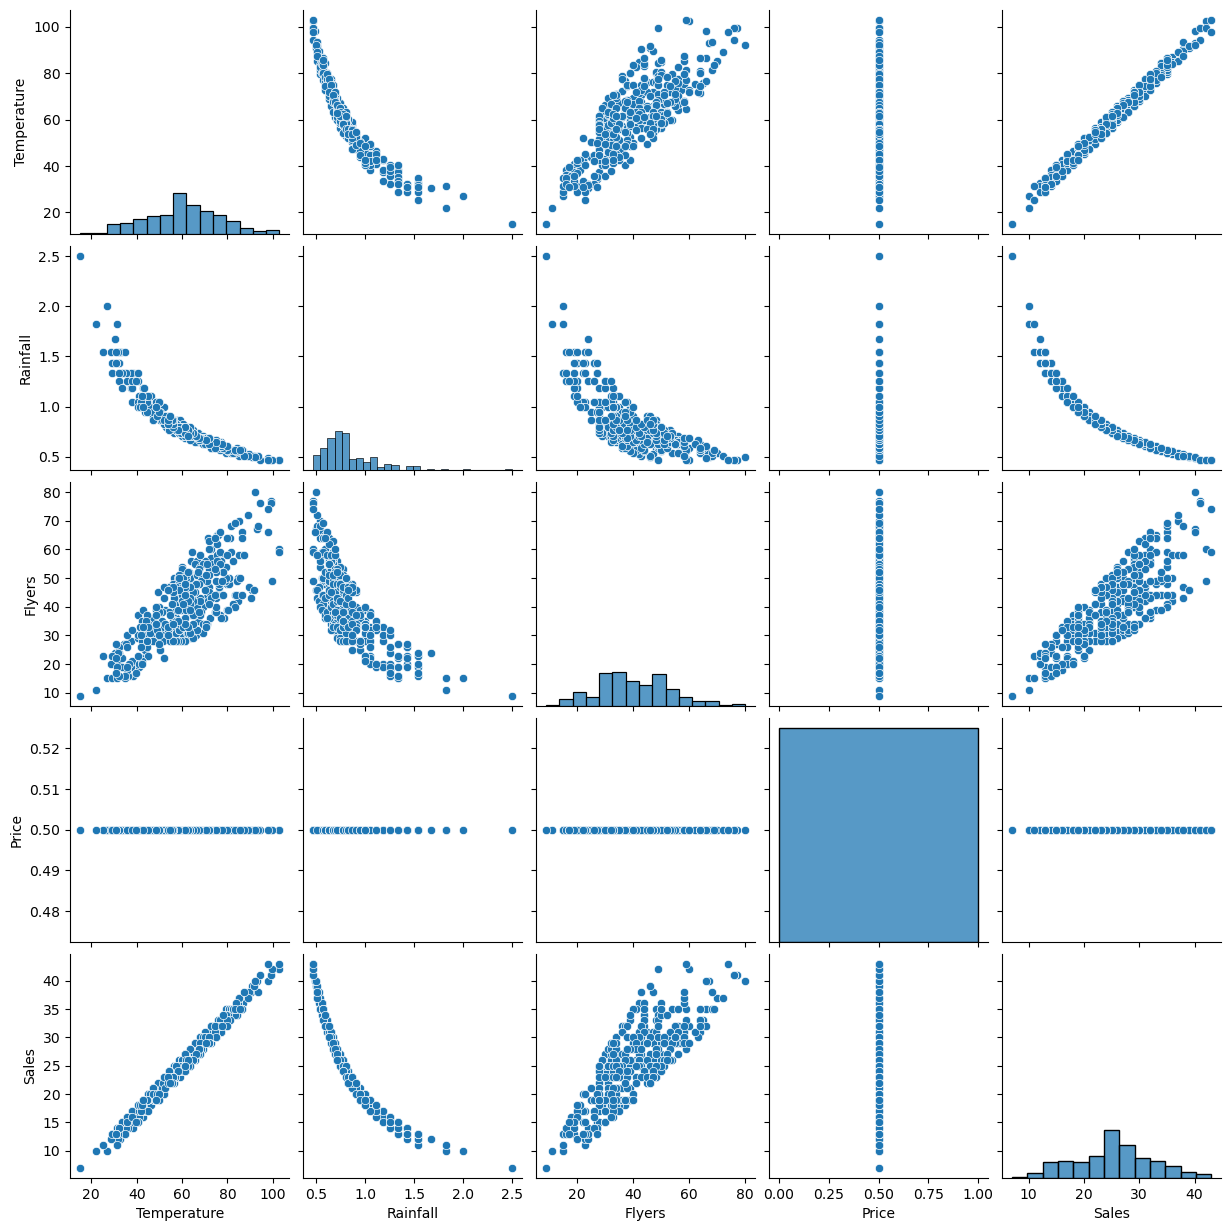

In [8]:
sns.pairplot(df)

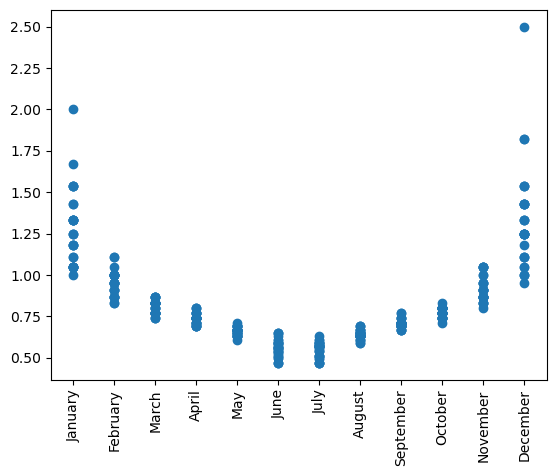

In [9]:
plt.scatter(df.Month, df.Rainfall)
plt.xticks(rotation = 90)
plt.show()

Temperature


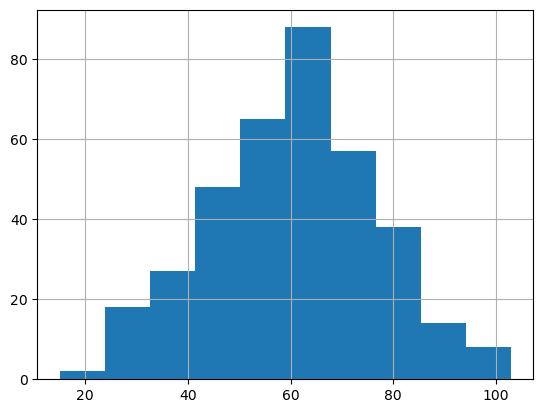

Rainfall


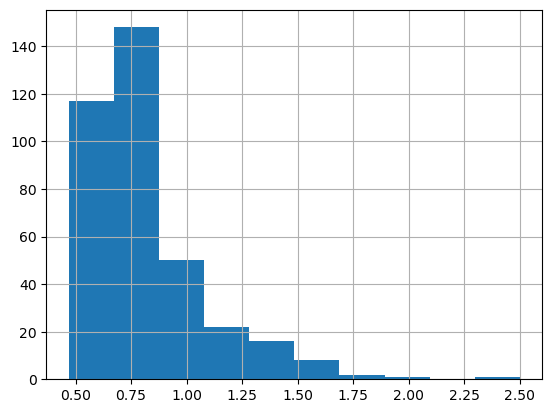

Flyers


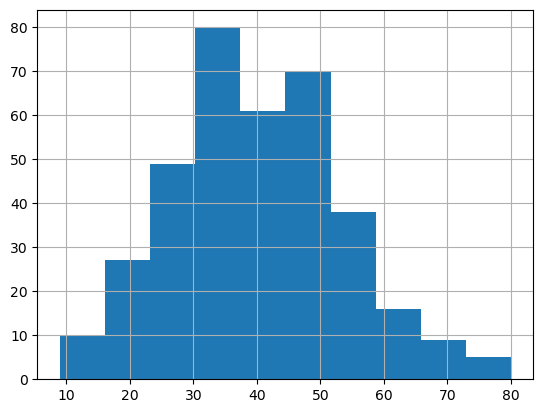

Price


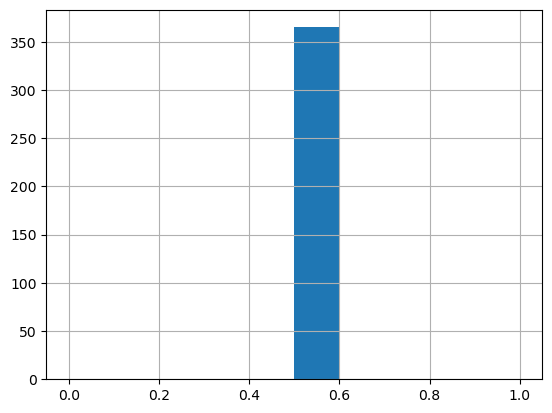

Sales


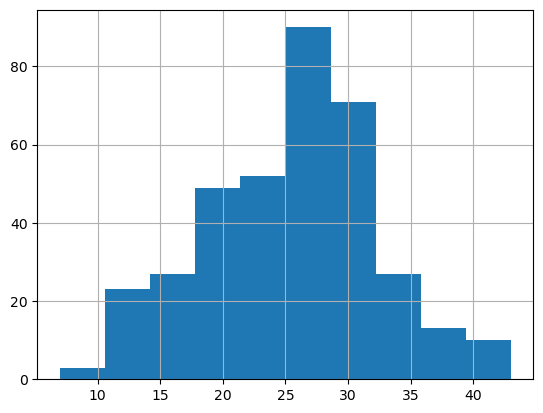

In [10]:
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        df[col].hist()
        print(col)
        plt.show()

In [11]:
# Let's use IQR for the dataset
def get_lower_and_upper_bounds(col, multiplier = 1.5):
    """
    Positional arguments:
    col: a pandas series
    keyword arguments:
    mult: default 1.5, the magnutidue specified for the IQR rule
    
    returns:
    lower_bound and upper)bound: two float values representing the f`ence values requested.
    """

    q1 = col.quantile(.25)
    q3 = col.quantile(.75)
    iqr = q3 - q1
    upper_bound = q3 + (multiplier * iqr)
    lower_bound = q1 - (multiplier * iqr)

    return upper_bound, lower_bound

In [12]:
outliers = {}
for col in df.columns:
    if np.issubdtype(df[col].dtype, np.number):
        lower_bound, upper_bound = get_lower_and_upper_bounds(df[col], multiplier = 1.5)
        outliers[col] = {}
        outliers[col]['bounds'] = {'upper' : upper_bound, 'lower' : lower_bound}

In [13]:
outliers

{'Temperature': {'bounds': {'upper': 17.30000000000001,
   'lower': 103.69999999999999}},
 'Rainfall': {'bounds': {'upper': 0.26, 'lower': 1.3}},
 'Flyers': {'bounds': {'upper': 4.0, 'lower': 76.0}},
 'Price': {'bounds': {'upper': 0.5, 'lower': 0.5}},
 'Sales': {'bounds': {'upper': 5.0, 'lower': 45.0}}}

In [14]:
df_stats = df.describe()


In [15]:
df_stats.Temperature



count    365.000000
mean      60.731233
std       16.196266
min       15.100000
25%       49.700000
50%       61.100000
75%       71.300000
max      102.900000
Name: Temperature, dtype: float64

In [16]:
z_scores = pd.Series((df['Temperature'] - df['Temperature'].mean()) / df['Temperature'].std())


In [17]:
df['z_scores_inf'] = z_scores


In [18]:
df[df['z_scores_inf'].abs() >= 2]


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_inf
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-2.082655
2017-01-06,Friday,25.3,1.54,23,0.5,11,January,-2.187617
2017-06-16,Friday,99.3,0.47,77,0.5,41,June,2.381337
2017-06-21,Wednesday,94.3,0.47,76,0.5,41,June,2.072624
2017-06-26,Monday,102.6,0.47,60,0.5,42,June,2.585088
2017-07-01,Saturday,102.9,0.47,59,0.5,43,July,2.603610
2017-07-02,Sunday,93.4,0.51,68,0.5,38,July,2.017056
2017-07-10,Monday,98.0,0.49,66,0.5,40,July,2.301072
2017-07-18,Tuesday,99.3,0.47,76,0.5,41,July,2.381337


In [19]:
df[(df['Temperature'] < lower_bound) | (df['Temperature'] > upper_bound)]


,Day,Temperature,Rainfall,Flyers,Price,Sales,Month,z_scores_inf
Date,,,,,,,,
2017-01-01,Sunday,27.0,2.00,15,0.5,10,January,-2.082655
2017-01-02,Monday,28.9,1.33,15,0.5,13,January,-1.965344
2017-01-03,Tuesday,34.5,1.33,27,0.5,15,January,-1.619585
2017-01-04,Wednesday,44.1,1.05,28,0.5,17,January,-1.026856
2017-01-05,Thursday,42.4,1.00,33,0.5,18,January,-1.131818
...,...,...,...,...,...,...,...,...
2017-12-27,Wednesday,42.7,1.00,33,0.5,19,December,-1.113296
2017-12-28,Thursday,37.8,1.25,32,0.5,16,December,-1.415835
2017-12-29,Friday,39.5,1.25,17,0.5,15,December,-1.310872


In [21]:
num_columns = df.loc[:, 'Temperature':].columns.to_list()

2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:

* Use a 2 sigma decision rule to isolate the outliers.

* Do these make sense?

* Should certain outliers be kept or removed?

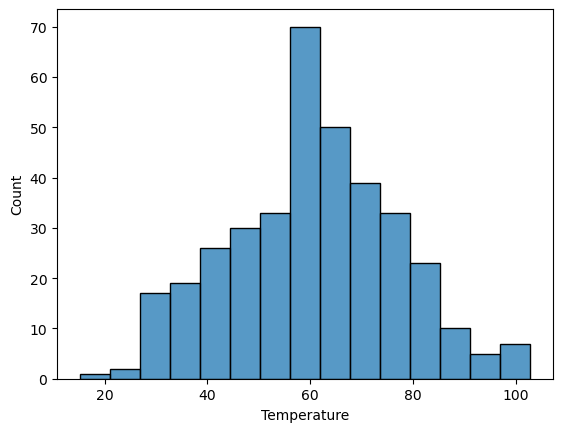

Temperature:
Minmum: 15.1, Lower bound: 28.34
Maximun: 102.9, Upper bound: 93.12376422747204


,Temperature
Date,
2017-01-01,27.0
2017-01-06,25.3
2017-06-16,99.3
2017-06-21,94.3
2017-06-26,102.6
2017-07-01,102.9
2017-07-02,93.4
2017-07-10,98.0
2017-07-18,99.3


True



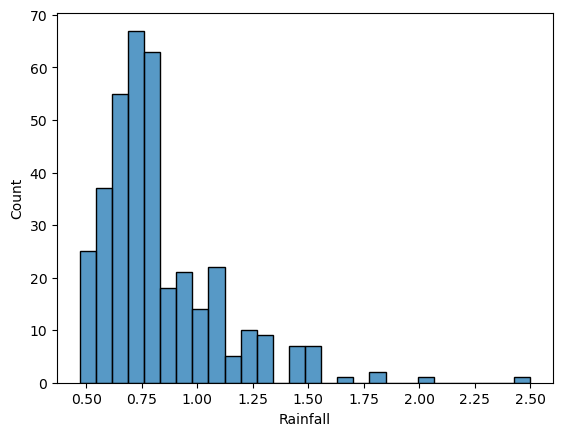

Rainfall:
Minmum: 0.47, Lower bound: 0.28
Maximun: 2.5, Upper bound: 1.3729450970428152


,Rainfall
Date,
2017-01-01,2.00
2017-01-06,1.54
2017-01-07,1.54
2017-01-11,1.54
2017-01-16,1.67
2017-01-17,1.43
2017-01-20,1.43
2017-01-24,1.54
2017-12-04,1.54


True



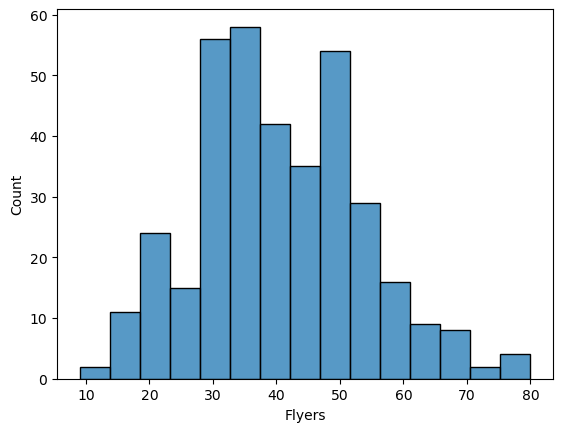

Flyers:
Minmum: 9, Lower bound: 13.93
Maximun: 80, Upper bound: 66.64223279179006


,Flyers
Date,
2017-06-12,67
2017-06-16,77
2017-06-20,70
2017-06-21,76
2017-07-02,68
2017-07-03,68
2017-07-14,80
2017-07-18,76
2017-07-23,72


True



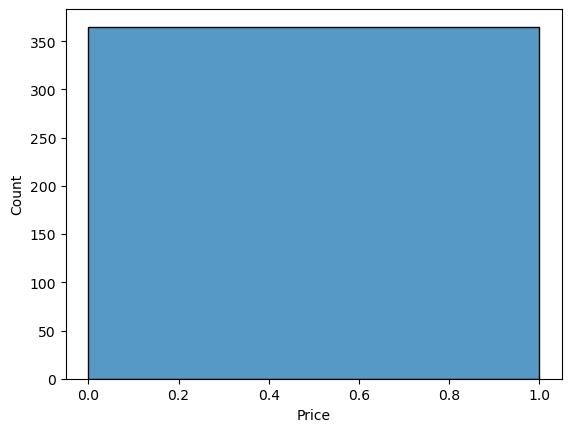

Price:
Minmum: 0.5, Lower bound: 0.5
Maximun: 0.5, Upper bound: 0.5


,Price
Date,


True



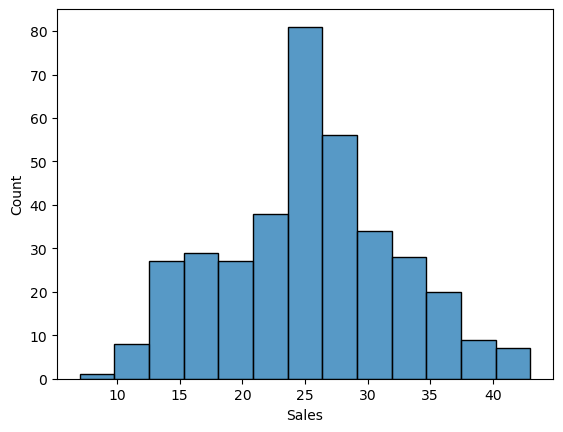

Sales:
Minmum: 7, Lower bound: 11.54
Maximun: 43, Upper bound: 39.11046600171165


,Sales
Date,
2017-01-01,10
2017-01-06,11
2017-06-12,40
2017-06-16,41
2017-06-21,41
2017-06-26,42
2017-07-01,43
2017-07-10,40
2017-07-14,40


True



TypeError: Could not convert JanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecember to numeric

In [22]:
for col in num_columns:
    df['zscore'] = (df[col] - df[col].mean()) / df[col].std()
    lower = df[col].mean() - 2 * df[col].std()
    upper = df[col].mean() + 2 * df[col].std()
    sns.histplot(data=df, x=col)
    plt.show()
    print(col +':')
    print(f'Minmum: {df[col].min()}, Lower bound: {round(lower, 2)}')
    print(f'Maximun: {df[col].max()}, Upper bound: {upper}')
    display(pd.DataFrame(df[df.zscore.abs() >= 2][col]))
    #display(df[(df[col] < lower)|(df[col]>upper)][col])
    print(df[df['zscore'].abs() >= 2][col].equals(df[(df[col] < lower)|(df[col]>upper)][col]))
    print()

3. Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from lemonade.csv

In [23]:
for i, col in zip(df.index, num_columns):
    df['zscore'] = (df[col] - df[col].mean()) / df[col].std()
    lower = df[col].mean() - 2 * df[col].std()
    upper = df[col].mean() + 2 * df[col].std()
    print(col +':')
    print(f'Minmum: {df[col].min()}, Lower bound: {round(lower, 2)}')
    print(f'Maximun: {df[col].max()}, Upper bound: {upper}')
    display(pd.DataFrame(df[df.zscore >=2][col]))
    print()

Temperature:
Minmum: 15.1, Lower bound: 28.34
Maximun: 102.9, Upper bound: 93.12376422747204


,Temperature
Date,
2017-06-16,99.3
2017-06-21,94.3
2017-06-26,102.6
2017-07-01,102.9
2017-07-02,93.4
2017-07-10,98.0
2017-07-18,99.3
2017-07-22,99.6
2017-07-27,97.9



Rainfall:
Minmum: 0.47, Lower bound: 0.28
Maximun: 2.5, Upper bound: 1.3729450970428152


,Rainfall
Date,
2017-01-01,2.00
2017-01-06,1.54
2017-01-07,1.54
2017-01-11,1.54
2017-01-16,1.67
2017-01-17,1.43
2017-01-20,1.43
2017-01-24,1.54
2017-12-04,1.54



Flyers:
Minmum: 9, Lower bound: 13.93
Maximun: 80, Upper bound: 66.64223279179006


,Flyers
Date,
2017-06-12,67
2017-06-16,77
2017-06-20,70
2017-06-21,76
2017-07-02,68
2017-07-03,68
2017-07-14,80
2017-07-18,76
2017-07-23,72



Price:
Minmum: 0.5, Lower bound: 0.5
Maximun: 0.5, Upper bound: 0.5


,Price
Date,



Sales:
Minmum: 7, Lower bound: 11.54
Maximun: 43, Upper bound: 39.11046600171165


,Sales
Date,
2017-06-12,40
2017-06-16,41
2017-06-21,41
2017-06-26,42
2017-07-01,43
2017-07-10,40
2017-07-14,40
2017-07-18,41
2017-07-22,42


TypeError: Could not convert JanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryJanuaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryFebruaryMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchMarchAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilAprilMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayMayJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJuneJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyJulyAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustAugustSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberSeptemberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberOctoberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberNovemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecemberDecember to numeric